In [29]:
cd ../

/home/ansem/Bureau


In [47]:
import os

import pandas as pd
import numpy as np
from os.path import join
import matplotlib.pyplot as plt

#-----------------------------------------------
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
#-----------------------------------------------
! cd ..
from Path_config import *

In [31]:
pwd

'/home/ansem/Bureau'

In [32]:
Full_data_path

'Zindi_womxn/Data/Full_data'

In [76]:
Train = pd.read_csv(join(Full_data_path , "Train.csv"))
Test = pd.read_csv(join(Full_data_path , "Test.csv"))
Full_data = pd.concat([Train,Test],0)
print("Full_data shape : ",Full_data.shape)

Full_data shape :  (3835, 63)


/home/ansem/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [77]:
Full_data['Family'] = Full_data['total_individuals'] / Full_data['total_households']

In [78]:
# MinMax Scaler
min_max_scaler = MinMaxScaler()

Full_data['scaled_total_households'] = min_max_scaler.fit_transform(Full_data['total_households'].values.reshape(-1,1))
Full_data  = Full_data.drop('total_households', axis=1)
Full_data['scaled_total_individuals'] = min_max_scaler.fit_transform(Full_data['total_individuals'].values.reshape(-1,1))
Full_data  = Full_data.drop('total_individuals', axis=1)
Full_data[['car_00', 'car_01', 'dw_00', 'dw_01', 'dw_02',
       'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08', 'dw_09', 'dw_10',
       'dw_11', 'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04', 'lan_05',
       'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11', 'lan_12',
       'lan_14', 'lgt_00', 'lln_00', 'lln_01', 'pg_00', 'pg_01',
       'pg_02', 'pg_03', 'pg_04', 'psa_00', 'psa_01', 'psa_02', 'psa_03',
       'psa_04', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05', 'pw_06',
       'stv_00', 'stv_01']] = min_max_scaler.fit_transform(Full_data[[  'car_00', 'car_01', 'dw_00', 'dw_01', 'dw_02',
       'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08', 'dw_09', 'dw_10',
       'dw_11', 'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04', 'lan_05',
       'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11', 'lan_12',
       'lan_14', 'lgt_00', 'lln_00', 'lln_01', 'pg_00', 'pg_01',
       'pg_02', 'pg_03', 'pg_04', 'psa_00', 'psa_01', 'psa_02', 'psa_03',
       'psa_04', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05', 'pw_06',
       'stv_00', 'stv_01']])

In [79]:
# add poor and rich %
Full_data['Worst_case'] = np.nan
Full_data['Best_case'] = np.nan
Full_data['Worst_case'] = Full_data['psa_01']+Full_data['car_01']+Full_data['stv_00']
Full_data['Best_case'] = Full_data['psa_00']+Full_data['car_00'] + Full_data['stv_01']

In [80]:
Full_data['ADM4_PCODE_encoded'] = LabelEncoder().fit_transform(Full_data['ADM4_PCODE'])
# Full_data['ZA'] = Full_data['ADM4_PCODE'].apply(lambda x : x[:3])
# Full_data["ADM4_PCODE"]=Full_data["ADM4_PCODE"].apply(lambda x:int(x.replace("ZA","")))
# Full_data["ADM4_PCODE_part_1"]=Full_data["ADM4_PCODE"].apply(lambda x:int( str(x)[0:5]))
# Full_data["ADM4_PCODE_part_2"]=Full_data["ADM4_PCODE"].apply(lambda x: int(str(x)[-3:]))

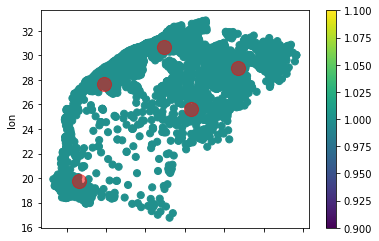

In [104]:
# Cluster Lat and Long 
kmeans = KMeans(n_clusters =5, init ='k-means++')
kmeans.fit(Full_data[['lat','lon']])
Full_data['cluster_label'] = kmeans.fit_predict(Full_data[['lat','lon']])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(Full_data[['lat','lat']])
# Full_data['cluster_label'].value_counts()
Full_data.plot.scatter(x = 'lat', y = 'lon', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='r', s=200, alpha=0.5)

In [82]:
Full_data['cluster_label'].value_counts()

2    1430
0     847
1     591
3     536
4     431
Name: cluster_label, dtype: int64

In [83]:
columns=Full_data.drop(["ward","target","ADM4_PCODE"],1).columns
# # # data["sum_columns"]=data[columns].sum(1)
# # # for column in  columns :
# # #     data[column]=data[column].round(2)
# # #     .map(data[column].round(3).value_counts())
data_km=Full_data[columns].copy()
km=KMeans(10,random_state=2019)
Full_data["cluster"]=km.fit_predict(data_km[columns])

In [84]:
Full_data["cluster"].value_counts()

4    430
0    430
9    427
5    427
1    427
6    427
2    425
3    421
7    420
8      1
Name: cluster, dtype: int64

In [85]:
Full_data['W'] = Full_data['ward'].apply(lambda x : x.split(':')[1])
Full_data['W'] = LabelEncoder().fit_transform(Full_data['W'])
Full_data['car_01_bin'] = Full_data['car_01'].apply(lambda x : np.round(x * 100) ) 
# Full_data['car_01_bin'] = Full_data['car_01_bin'].apply(lambda x : 1 if x>50  else 0)
Full_data['psa_01_bin'] = Full_data['psa_01'].apply(lambda x : np.round(x * 100) ) 
# Full_data['psa_01_bin'] = Full_data['psa_01_bin'].apply(lambda x : 1 if x>50  else 0)
Full_data['stv_01_bin'] = Full_data['stv_01'].apply(lambda x : np.round(x * 100) ) 
Full_data['W_encoded1'] = Full_data.groupby('W')['psa_01_bin'].transform('mean')
Full_data['W_encoded2'] = Full_data.groupby('W')['car_01_bin'].transform('mean')
Full_data['W_encoded3'] = Full_data.groupby('W')['stv_01_bin'].transform('mean')
Full_data = Full_data.drop(['W','car_01_bin','psa_01_bin','stv_01_bin'],1)

In [86]:
# target Encoder
Full_data['Cluster_label_encoded'] = Full_data.groupby('cluster_label')['target'].transform('mean')

In [87]:
Train['NL'] = Train['NL'].apply(lambda x : np.round(x * 10) ) 

In [88]:
Train['NL'] 

0        3.0
1       32.0
2        0.0
3       20.0
4        0.0
        ... 
2817    91.0
2818    17.0
2819    28.0
2820    28.0
2821     0.0
Name: NL, Length: 2822, dtype: float64

# Drop feature with low trend-correlation      

In [89]:
Full_data = Full_data.drop([ 'dw_00','dw_02', 'dw_06','dw_12','dw_13','psa_02','lan_02','lan_03','lan_04',
    'lan_05','lan_08','lan_13', 'pw_01', 'pw_07','pw_08' , 'lan_07','NL' ],1)

In [98]:
Full_data.to_csv(join(Final_data_path , "Final_Full_data.csv"), index=False)

In [99]:
from IPython.display import FileLink
FileLink("Final_Full_data.csv")

/home/ansem/Bureau/Final_Full_data.csv